In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Marked Correlation Function

# $M(r) = \frac{1+W(r)}{1+\xi(r)} = \frac{\frac{WW(r)-2WR(r) +RR(r)}{RR(r)} + 1 }{\frac{DD(r)-2DR(r) +RR(r)}{RR(r)} + 1 } $ 

In [62]:
def MCF(data,marks,rbins,L_box,random_catalog):#data = XYZ position of galaxies
    
    N = len(data)
    r_max = np.amax(rbins)
    
    N_random =len(random_catalog)
     
    #creating a random catalogue
    
    distance = []
    distance_random = []
    distance_DR = []
    DD = []
    RR = []
    DR= []
    mark_array=[]
    mark_array_WR = []


    WW = []
    WR = []
    
    #To make the code faster, I considered a box with the size of 2*r_max around each galaxy.
    # I just computed separarions for galaxies in this box
    for i in range(len(data)): 
        
        d = np.abs(data[i,:]-data[i+1:,:])  #periodic boundary condition
        d[d>L_box/2] = L_box - d[d>L_box/2]

        

        distance.append(((d[(d[:,0]< r_max)&(d[:,1]< r_max)&(d[:,2]< r_max)]**2).sum(axis=1))**(0.5))
        
        mark_array.append(marks[i]*marks[i+1:][(d[:,0]< r_max)&(d[:,1]< r_max)&(d[:,2]< r_max)])


        
    # the same procedure for the random catalog    
    for i in range(len(random_catalog)):
        
                
        d = np.abs(random_catalog[i,:]-random_catalog[i+1:,:])
        d[d>L_box/2] = L_box - d[d>L_box/2]

        distance_random.append(((d[(d[:,0]< r_max)&(d[:,1]< r_max)&(d[:,2]< r_max)]**2).sum(axis=1))**(0.5))
        
         

        
        
 
   # for i in range(len(data)): 
        
                       
     #   d = np.abs(data[i,:]-random_catalog[:,:])
     #   d[d>L_box/2] = L_box - d[d>L_box/2]
   
        
      #  distance_DR.append(((d[(d[:,0]< r_max)&(d[:,1]< r_max)&(d[:,2]< r_max)]**2).sum(axis=1))**(0.5))
        
       # mark_array_WR.append(np.repeat(marks[i],len(d[(d[:,0]< r_max)&(d[:,1]< r_max)&(d[:,2]< r_max)])))
    
        
                
    distance = [i for sublist in distance for i in sublist] 
    distance_random = [i for sublist in distance_random for i in sublist]
   # distance_DR = [i for sublist in distance_DR for i in sublist]
    
    distance = np.array(distance)
    distance_random = np.array(distance_random)
   # distance_DR = np.array(distance_DR)
    
    mark_array = [i for sublist in mark_array for i in sublist]
   # mark_array_WR = [i for sublist in mark_array_WR for i in sublist]
    
    
    mark_array = np.array(mark_array)
   # mark_array_WR=np.array(mark_array_WR)
    #computing the histogram
    for j in range(len(rbins)-1):
        condition = (distance<rbins[j+1])&(distance>rbins[j])
        DD.append(len(distance[condition]))
        
        WW.append(mark_array[condition].sum())
        
        condition = (distance_random<rbins[j+1])&(distance_random>rbins[j])
        RR.append(len(distance_random[condition]))
        
       # condition = (distance_DR<rbins[j+1])&(distance_DR>rbins[j])
        #DR.append(len(distance_DR[condition]))
        #WR.append(mark_array_WR[condition].sum())
        
        

    xi = (np.array(DD)/(N*(N-1)/2))/(np.array(RR)/(N_random*(N_random-1)/2)) -1  
    #xi = ((np.array(DD)/(len(data)*(len(data)-1)/2)) - (2*np.array(DR)/(len(data)*N_random)) +(np.array(RR)/(N_random*(N_random-1)/2)))/(np.array(RR)/(N_random*(N_random-1)/2)) 
    
 

    

        
  
        
   

    
    

        
        
        
        
  

    W = (np.array(WW)/(N*(N-1)/2))/(np.array(RR)/(N_random*(N_random-1)/2)) -1    
    #W = ((np.array(WW)/(len(data)*(len(data)-1)/2)) - (2*np.array(WR)/(len(data)*N_random)) +(np.array(RR)/(N_random*(N_random-1)/2)))/(np.array(RR)/(N_random*(N_random-1)/2)) 
    
    M = (1+W)/(1+xi)
        
    
    return(M)

    

# Comparing the results with Halotools Package

In [55]:
data = pd.read_csv('SMDPL-z0-Me11.csv')

In [56]:
data=data[data['mass']>1e13]

In [57]:
data.head()

,row_id,x,y,z,mass
45502,45503,220.77600,14.1274,36.4722,1.000190e+13
45503,45504,94.68610,92.4944,267.5110,1.000770e+13
45504,45505,2.38879,230.1650,292.9220,1.001030e+13
45505,45506,165.77100,356.2850,89.4645,1.001310e+13
45506,45507,367.66900,90.1397,237.7350,1.001660e+13


In [58]:
marks = data['mass'].values
data = data[['x','y','z']].values


In [59]:
marks = marks/np.mean(marks)

In [60]:
len(data)

29629

In [63]:

rbins=np.linspace(0.1,10,10)
L_box =400
N_random = 3*len(data)
random_cat= np.random.uniform(0,L_box,(N_random,3))
mcf =MCF(data,marks,rbins,L_box,random_cat)

In [64]:

from halotools.mock_observables import marked_tpcf
halotools_mcf =  marked_tpcf(data, rbins, marks1=marks, period=400, normalize_by='number_counts', weight_func_id=1)

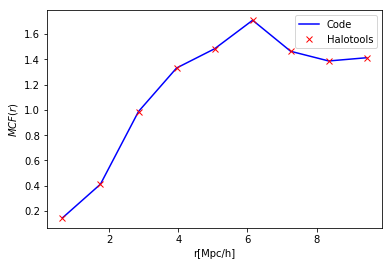

In [66]:
bincenters = 0.5*(rbins[1:]+rbins[:-1])
plt.plot(bincenters,mcf,color='blue',label='Code')
plt.plot(bincenters,halotools_mcf,'rx',label='Halotools')
plt.ylabel('$MCF(r)$');
plt.xlabel('r[Mpc/h]');
plt.legend(loc=0);